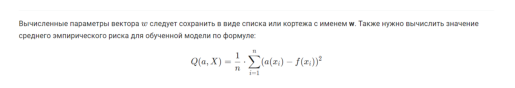

In [1]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../img/2_1_2.png')  # Загрузите изображение, указав путь к файлу.
plt.imshow(img)  # Отобразите изображение.
plt.axis('off')  # Отключите отображение осей.
plt.show()

[ 4.98645739 -0.41780964  0.10273088  0.0317247 ] 0.13061791219815425


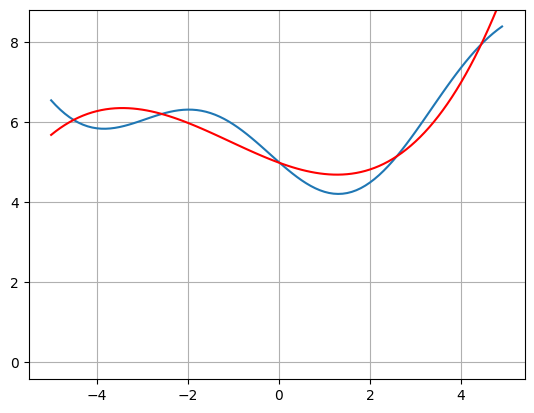

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import time

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.1 * x**2 - np.sin(x) + 5.

def df(x):
    s = np.array([1, x, x**2, x**3])
    return np.dot((np.dot(w, np.transpose(s)) - func(x)), s)

coord_x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]) # начальные значения параметров модели
N = 200 # число итераций градиентного алгоритма

X = np.power(coord_x.reshape(-1, 1), range(4))

plt.ion()
fig, fx = plt.subplots()
fx.grid(True)
fx.plot(coord_x, coord_y)

approx = fx.plot(coord_x, X @ w.T, c="red")[0]
# coord_x.reshape(-1, 1) - транспонируем матрицу, а также теперь каждый элемент массива это матрица из этого элемента 
# X - это массив, состоящий из массивов такого вида [1, x, x**2, x**3] - x - это элемент в изначальном массиве
for _ in range(N):
    y_pred = X @ w # находим точки модели аппроксимации с помощью скалярного произведения
    w -= eta * 2 * ((y_pred - coord_y) * X.T).mean(1)
    approx.set_ydata(X @ w.T)
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.01)

Q = np.square(y_pred - coord_y).mean()
print(w, Q)

plt.ioff()
plt.show()